GUIDED PROJECT FROM DATAQUEST Part of the course Machine Learning Fundamentals

Last updated: April 7, 2018

In [1]:
# Loading the Data

import pandas as pd
import numpy as np
import math

# Loading the data set
cars = pd.read_csv("imports-85.data", header = None)
cars.columns = ["symbolizing", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

cars.head()

,symbolizing,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
# Data Cleaning Part 1

# Cleaning - replacing ? with NaN
cars.replace(to_replace = "?", value = np.nan, inplace = True)

# Cleaning - converting to numeric values

# Creating the column list for conversion
column_list = ["normalized_losses", "num_doors", "curb_weight", "engine_size", "bore", "stroke", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]


# Replacing text values with numerical values in the column num_doors
cars["num_doors"].replace(to_replace = "two", value = 2, inplace = True)
cars["num_doors"].replace(to_replace = "four", value = 4, inplace = True)

temp = cars["num_doors"].iloc[27]

cars["num_doors"].replace(to_replace = temp, value = np.nan, inplace = True)

# Replacing text values with numerical values in the column num_cylinder
num_cylinder_dictionary = {"four": 4.0, "six": 6.0, "five": 5.0, "three": 3.0, "twelve": 12.0, "two": 2.0, "eight": 8.0}

for text, number in num_cylinder_dictionary.items():
    cars["num_cylinders"].replace(to_replace = text, value = number, inplace = True)

# Converting selected columns to float
for title in column_list:
    cars[title] = cars[title].astype(float)

In [3]:
# Data Cleaning Part 2

# Cleaning - Eliminating null values for column normalized_losses, bore, stroke, and price

columns_for_mean = ["normalized_losses", "bore", "stroke", "price"]
averages = []

for title in columns_for_mean:
    temp = cars[title].mean()
    averages.append(temp)
    
for i, title in enumerate(columns_for_mean):
    cars[title] = cars[title].fillna(averages[i])

# Cleaning - Eliminating rows where num_doors, horsepower and peak_rpm are null
cars = cars.dropna(subset = [["num_doors", "peak_rpm", "horsepower"]])

cars.head()

,symbolizing,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,122.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [4]:
# Normalizing the Data Set

from sklearn.preprocessing import MinMaxScaler

# Normalizing Using MinMaxScaler

numerical_columns = ["normalized_losses", "num_doors", "curb_weight", "num_cylinders", "engine_size", "bore", "stroke", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
new_cars = cars[numerical_columns].copy()

scaler = MinMaxScaler()
scaler = scaler.fit(new_cars)

temp = scaler.transform(new_cars)

normalized_cars = pd.DataFrame(temp)
normalized_cars.columns = numerical_columns

normalized_cars.head()

,normalized_losses,num_doors,curb_weight,num_cylinders,engine_size,bore,stroke,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.0,0.411171,0.2,0.260377,0.664286,0.290476,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.298429,0.0,0.411171,0.2,0.260377,0.664286,0.290476,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.298429,0.0,0.517843,0.4,0.343396,0.100000,0.666667,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.518325,1.0,0.329325,0.2,0.181132,0.464286,0.633333,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.518325,1.0,0.518231,0.3,0.283019,0.464286,0.633333,0.279167,0.551020,0.138889,0.157895,0.306142


In [5]:
# Machine Learning Model: Various Univariate Models Using Numerical Features of the Data Set
# Number of Neighbors equal to the Default Value of KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import math

def knn_train_test(train_column, k, fold = 1, test_column = "price", df = normalized_cars):
    if fold == 1:
        train_df = df.iloc[0:150]
        test_df = df.iloc[150:]
    
        knn = KNeighborsRegressor(n_neighbors = k)
    
        train_features = train_df[train_column]
        train_target = train_df[test_column]
        knn.fit(train_features, train_target)
    
        predictions = knn.predict(test_df[train_column])
    
        mse = mean_squared_error(test_df[test_column], predictions)
        rmse = math.sqrt(mse)
    
        return(rmse)
    else:
        kf = KFold(fold, shuffle = True, random_state = 1)
        model = KNeighborsRegressor(n_neighbors = k)
        mses = cross_val_score(model, df[train_column], df[test_column], scoring = "neg_mean_squared_error", cv = kf)
        rmses = np.sqrt(np.abs(mses))
        avg_rmse = np.std(rmses)
        return(avg_rmse)

# Single Fold Univariate Models for the default value of k
univariate_columns = numerical_columns[0:11]  
univariate_rmse = {}

for title in univariate_columns:
    temp = knn_train_test([title], 5)
    univariate_rmse[title] = temp

print(univariate_rmse)

{'normalized_losses': 0.20195872037574736, 'num_doors': 0.12280170223540916, 'curb_weight': 0.06311430906124822, 'num_cylinders': 0.11356732845379242, 'engine_size': 0.0897243614501898, 'bore': 0.20951519608245814, 'stroke': 0.19062981637807194, 'horsepower': 0.09684813297824986, 'peak_rpm': 0.15980979688078267, 'city_mpg': 0.08524808000911323, 'highway_mpg': 0.06635978420132564}


Based on the results of the various univariate models using the numerical columns, the smallest rmse value was obtained for the model using curb_weight as the training column - rmse value equal to 0.06311.

In [6]:
# Machine Learning Model: Various Univariate Models Using Numerical Features of the Data Set
# Number of Neighbors Varied Accordingly

# Single Fold Univariate models for various values of k

k = [1, 3, 5, 7, 9]
rmse_dictionary = {}

for title in univariate_columns:
    rmse_temp = []
    
    for i in k:
        temp = knn_train_test([title], i)
        rmse_temp.append(temp)
    
    rmse_dictionary[title] = rmse_temp

rmse_df = pd.DataFrame(rmse_dictionary)
rmse_df = rmse_df

k_series = pd.Series(k) 

rmse_df["k_values"] = k_series

rmse_df.head()

,bore,city_mpg,curb_weight,engine_size,highway_mpg,horsepower,normalized_losses,num_cylinders,num_doors,peak_rpm,stroke,k_values
0,0.155581,0.122084,0.086523,0.122380,0.107183,0.121226,0.206242,0.228875,0.172478,0.307286,0.345790,1
1,0.252440,0.089325,0.062737,0.112983,0.072220,0.103544,0.213752,0.170990,0.115401,0.236864,0.242614,3
2,0.209515,0.085248,0.063114,0.089724,0.066360,0.096848,0.201959,0.113567,0.122802,0.159810,0.190630,5
3,0.195062,0.081158,0.067511,0.083302,0.059283,0.101646,0.207012,0.105839,0.117565,0.163697,0.153514,7
4,0.159341,0.079904,0.066303,0.079958,0.064935,0.096001,0.193173,0.111379,0.144963,0.163882,0.131032,9


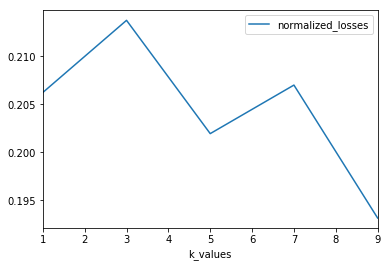

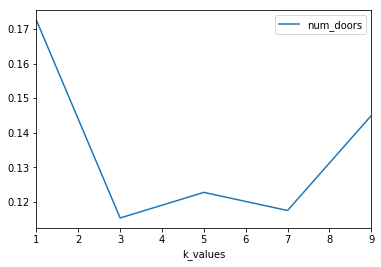

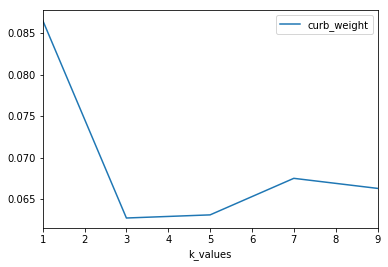

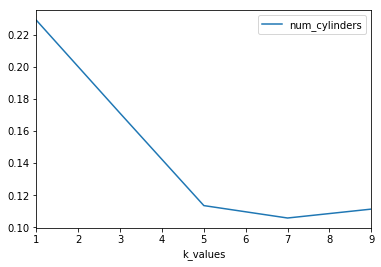

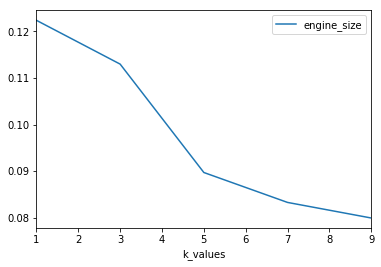

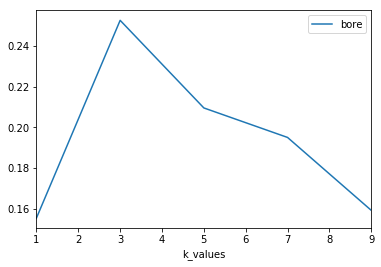

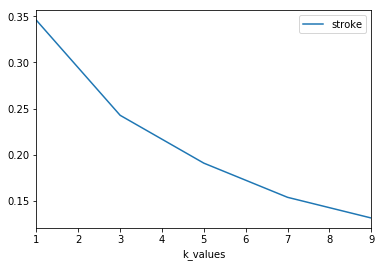

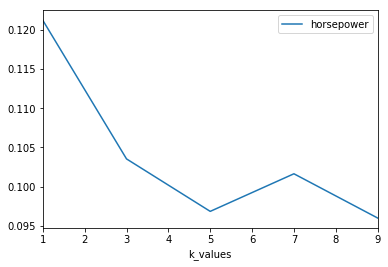

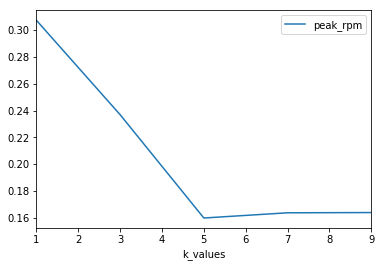

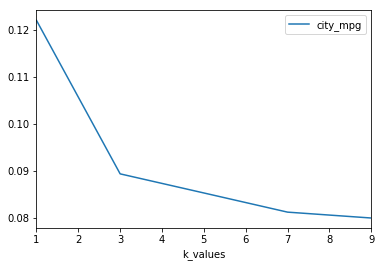

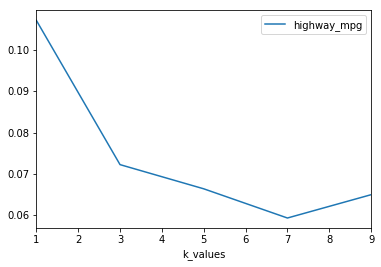

In [7]:
# Plotting the rmse values against the number of neighbors for the single fold univariate models of the previous cell

%matplotlib inline

for title in univariate_columns:
    rmse_df.plot(x = "k_values", y = title, kind = "line")

Feature: bore, Optimal k value = 1

Feature: normalized_losses, Optimal k value = 9

Feature: num_doors, Optimal k value = 3

Feature: curb_weight, Optimal k value = 3

Feature: num_cylinders, Optimal k value = 7

Feature: engine_size, Optimal k value = 9

Feature: stroke, Optimal k value = 9

Feature: horsepower, Optimal k value = 9

Feature: peak_rpm, Optimal k value = 5

Feature: city_mpg, Optimal k value = 9

Feature: highway_mpg, Optimal k value = 7

In [8]:
# Single Fold Machine Learning Model Using All Feature Columns
rmse_all = knn_train_test(univariate_columns,5)

print(rmse_all)

0.06447472162168758


In [9]:
# Single Fold Machine Learning Model Using the Best 2 Features
# Features: curb_weight & highway_mpg

best_two = ["curb_weight", "highway_mpg"]
rmse_best_two = knn_train_test(best_two, 5)

print(rmse_best_two)

0.07954878138950915


In [10]:
# Single Fold Machine Learning Model Using the Best 3 Features
# Features: curb_weight, highway_mpg & city_mpg

best_three = best_two + ["city_mpg"]
rmse_best_three = knn_train_test(best_three, 5)

print(rmse_best_three)

0.05537401881445683


In [11]:
# Single Fold Machine Learning Model Using the Best 4 Features
# Features: curb_weight, highway_mgp, city_mpg & engine_size

best_four = best_three + ["engine_size"]
rmse_best_four = knn_train_test(best_four, 5)

print(rmse_best_four)

0.05965530852626958


In [12]:
# Single Fold Machine Learning Model Using the Best 5 Features
# Features: curb_weight, highway_mgp, city_mpg, engine_size & horsepower

best_five = best_four + ["horsepower"]
rmse_best_five = knn_train_test(best_five, 5)

print(rmse_best_five)

0.0713773623709086


Best Model: Best three features

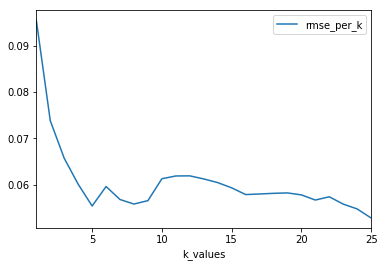

In [13]:
# Single Fold Machine Learning Model Optimization
# Best Three Features Model
# Features: curb_weight, highway_mpg, city_mpg

k_values = list(range(1, 26))
rmse_per_k = []

for i in k_values:
    temp = knn_train_test(best_three, i)
    rmse_per_k.append(temp)

rmse_dictionary = {"k_values": k_values, "rmse_per_k": rmse_per_k}
rmse_best_three_df = pd.DataFrame(rmse_dictionary)

rmse_best_three_df.plot(x = "k_values", y = "rmse_per_k", kind = "line")

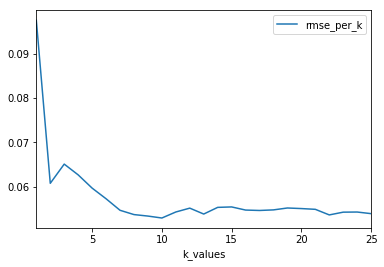

In [14]:
# Single Fold Machine Learning Model Optimization
# Best Four Features Model
# Features: curb_weight, highway_mpg, city_mpg, engine_size

rmse_per_k = []

for i in k_values:
    temp = knn_train_test(best_four, i)
    rmse_per_k.append(temp)

rmse_dictionary = {"k_values": k_values, "rmse_per_k": rmse_per_k}
rmse_best_four_df = pd.DataFrame(rmse_dictionary)

rmse_best_four_df.plot(x = "k_values", y = "rmse_per_k", kind = "line")

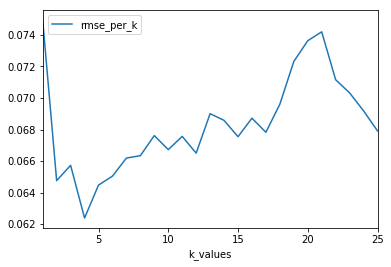

In [15]:
# Single Fold Machine Learning Optimization Model
# All Features Model

rmse_per_k = []

for i in k_values:
    temp = knn_train_test(univariate_columns, i)
    rmse_per_k.append(temp)
    
rmse_dictionary = {"k_values": k_values, "rmse_per_k": rmse_per_k}
rmse_all_df = pd.DataFrame(rmse_dictionary)

rmse_all_df.plot(x = "k_values", y = "rmse_per_k", kind = "line")


In [16]:
# Testing the Multiple Fold Code on a Set of
# 3-Fold Univariate Models for the default value of k

three_fold_univariate_rmse = {}

for title in univariate_columns:
    temp = knn_train_test([title], 5, fold = 3)
    three_fold_univariate_rmse[title] = temp

print(three_fold_univariate_rmse)


{'normalized_losses': 0.018563181714376431, 'num_doors': 0.011004322288166644, 'curb_weight': 0.013866182360797015, 'num_cylinders': 0.023989747364374984, 'engine_size': 0.014064337105665939, 'bore': 0.022561214464791774, 'stroke': 0.008313006256975267, 'horsepower': 0.023000544192878263, 'peak_rpm': 0.026960117074608811, 'city_mpg': 0.024330859346919646, 'highway_mpg': 0.014142530177510512}
